In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#importing model
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
#evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import joblib

In [2]:
df=pd.read_csv('crop_yield.csv')
df

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909
...,...,...,...,...,...,...,...,...,...,...
19684,Small millets,1998,Kharif,Nagaland,4000.0,2000,1498.0,395200.00,1160.00,0.500000
19685,Wheat,1998,Rabi,Nagaland,1000.0,3000,1498.0,98800.00,290.00,3.000000
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.0,440900,1356.2,29586735.11,96373.73,1.285000
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.0,5488,1356.2,26242746.82,85481.26,0.016667


In [3]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [4]:
df.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [7]:
df['Yield'].value_counts()

Yield
1.000000    167
0.000000    112
0.500000     73
2.000000     47
0.750000     42
           ... 
1.498519      1
1.304375      1
1.745714      1
2.552857      1
0.388000      1
Name: count, Length: 13551, dtype: int64

In [8]:
df.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')

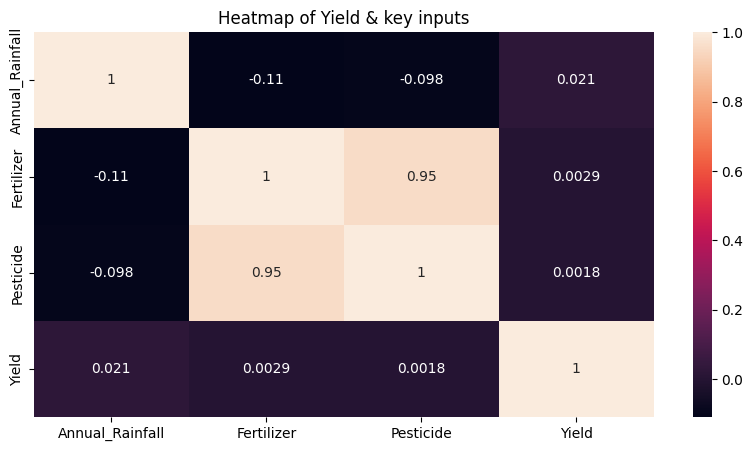

In [9]:
corr_cols=['Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']
corr_matrix=df[corr_cols].corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix,annot=True)
plt.title("Heatmap of Yield & key inputs")
plt.show()

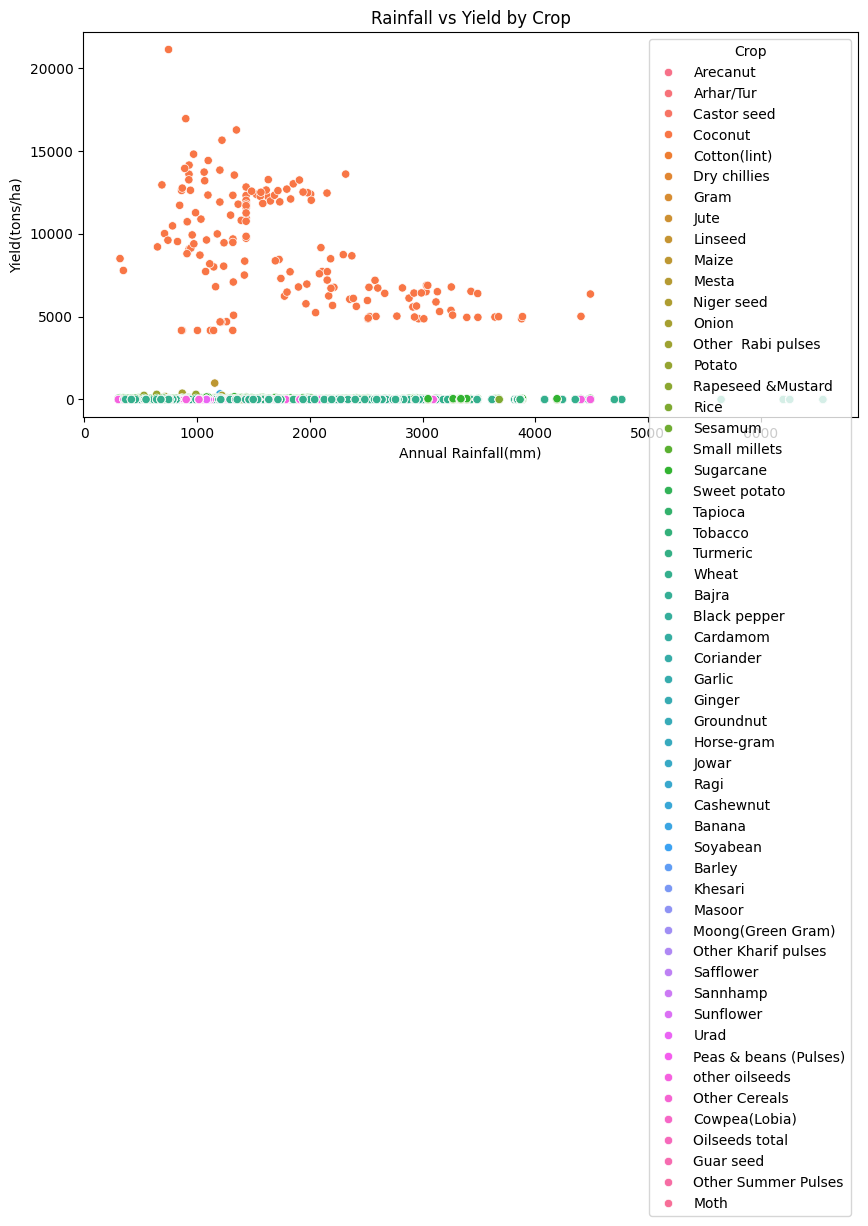

In [10]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x='Annual_Rainfall',y='Yield',hue='Crop')
plt.title('Rainfall vs Yield by Crop')
plt.xlabel('Annual Rainfall(mm)')
plt.ylabel('Yield(tons/ha)')
plt.show()

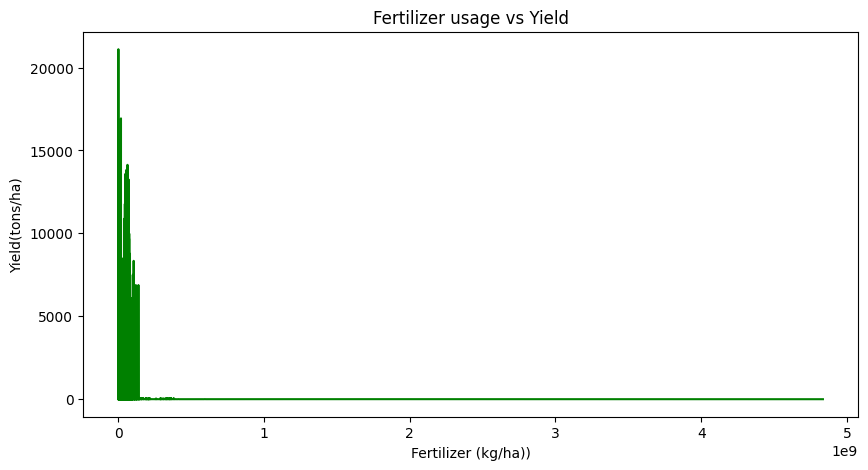

In [11]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df.sort_values('Fertilizer'),x='Fertilizer',y='Yield',color='green')
plt.title('Fertilizer usage vs Yield')
plt.xlabel('Fertilizer (kg/ha))')
plt.ylabel('Yield(tons/ha)')
plt.show()

In [12]:
df.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')

In [13]:

main_cols=['Crop','Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']
df=df[main_cols].dropna()

In [14]:
df.head()

,Crop,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,2051.4,631643.29,2057.47,0.710435
2,Castor seed,2051.4,75755.32,246.76,0.238333
3,Coconut,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),2051.4,165500.63,539.09,0.420909


In [15]:
le=LabelEncoder()
df['Crop']=le.fit_transform(df['Crop'])

In [16]:
X=df[['Crop','Annual_Rainfall', 'Fertilizer', 'Pesticide']]
Y=df['Yield']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [17]:
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [18]:
def models (xx,yy):
    from  sklearn.ensemble import RandomForestRegressor
    forest=RandomForestRegressor()
    forest.fit(xx,yy)
    print(f"Forest's score: {forest.score(xx,yy)}")
    return forest

In [19]:
model=models(x_train,y_train)

Forest's score: 0.9899916608059198


In [20]:

y_pred = model.predict(x_test)
r2=r2_score(y_test,y_pred)
print(f"R2 Score: {r2}")

R2 Score: 0.9559273553218753


In [21]:
joblib.dump(model,"Yield_model.joblib")
joblib.dump(le,'crop_encoder.joblib')

['crop_encoder.joblib']